In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
from matplotlib.patches import FancyArrowPatch
from matplotlib import cm
from matplotlib.colors import Normalize


In [42]:
PROMPTS = [1, 2, 3, 4]
CKPTS = [0, 25600, 51200, 153600, 307200, 460800, 614400, 819200, 1024000, 1228800]

In [43]:
fileformat = '/home/echeng/llm_compositionality/data/saved_reps_post_finetune/prompts_{}_step_{}_gride.json' # prompt, ckpt
surprisalformat = '/home/echeng/llm_compositionality/data/surprisals/EleutherAI_pythia-410m-deduped_step{}_{}_words_correlated.json' # ckpt, prompt

/tmp/ipykernel_1516598/451924449.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
/tmp/ipykernel_1516598/451924449.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ckpt 0
1
ckpt 25600
1
ckpt 51200
1
ckpt 153600
1
ckpt 307200
1
ckpt 460800
1
ckpt 614400
1
ckpt 819200
1
ckpt 1024000
1
ckpt 1228800
1
ckpt 0
2
ckpt 25600
2
ckpt 51200
2
ckpt 153600
2
ckpt 307200
2
ckpt 460800
2
ckpt 614400
2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ckpt 819200
2
ckpt 1024000
2
ckpt 1228800
2
ckpt 0
3
ckpt 25600
3
ckpt 51200
3
ckpt 153600
3
ckpt 307200
3
ckpt 460800
3
ckpt 614400
3
ckpt 819200
3
ckpt 1024000
3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ckpt 1228800
3
ckpt 0
4
ckpt 25600
4
ckpt 51200
4
ckpt 153600
4
ckpt 307200
4
ckpt 460800
4
ckpt 614400
4
ckpt 819200
4
ckpt 1024000
4
ckpt 1228800
4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ckpt 0
1
ckpt 25600
1
ckpt 51200
1
ckpt 153600
1
ckpt 307200
1
ckpt 460800
1
ckpt 614400
1
ckpt 819200
1
ckpt 1024000
1
ckpt 1228800
1
ckpt 0
2
ckpt 25600
2
ckpt 51200
2
ckpt 153600
2
ckpt 307200
2
ckpt 460800
2
ckpt 614400
2
ckpt 819200
2
ckpt 1024000
2
ckpt 1228800
2
ckpt 0
3
ckpt 25600
3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ckpt 51200
3
ckpt 153600
3
ckpt 307200
3
ckpt 460800
3
ckpt 614400
3
ckpt 819200
3
ckpt 1024000
3
ckpt 1228800
3
ckpt 0
4
ckpt 25600
4
ckpt 51200
4
ckpt 153600
4
ckpt 307200
4
ckpt 460800
4
ckpt 614400
4
ckpt 819200
4
ckpt 1024000
4
ckpt 1228800
4


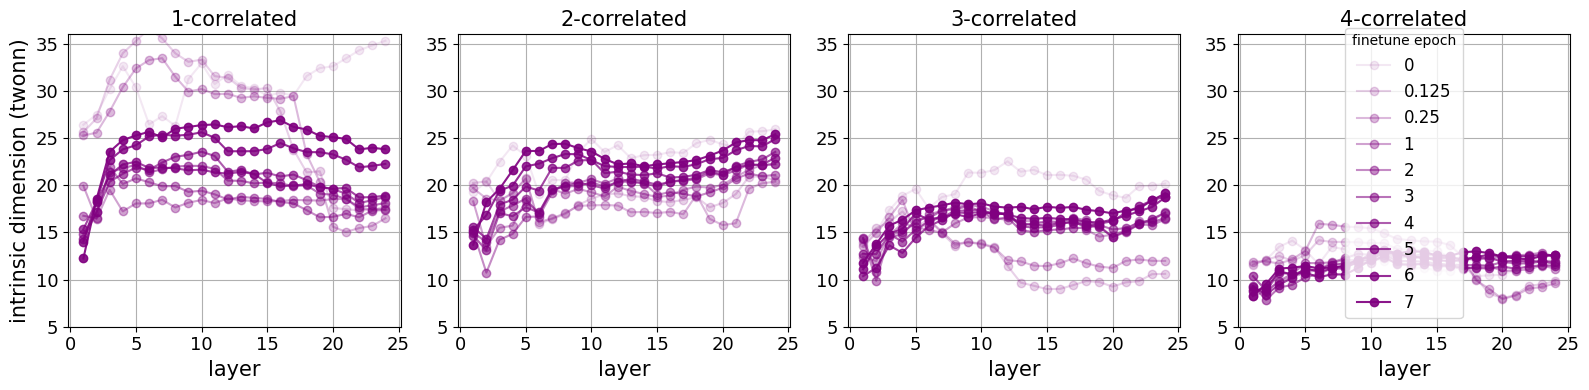

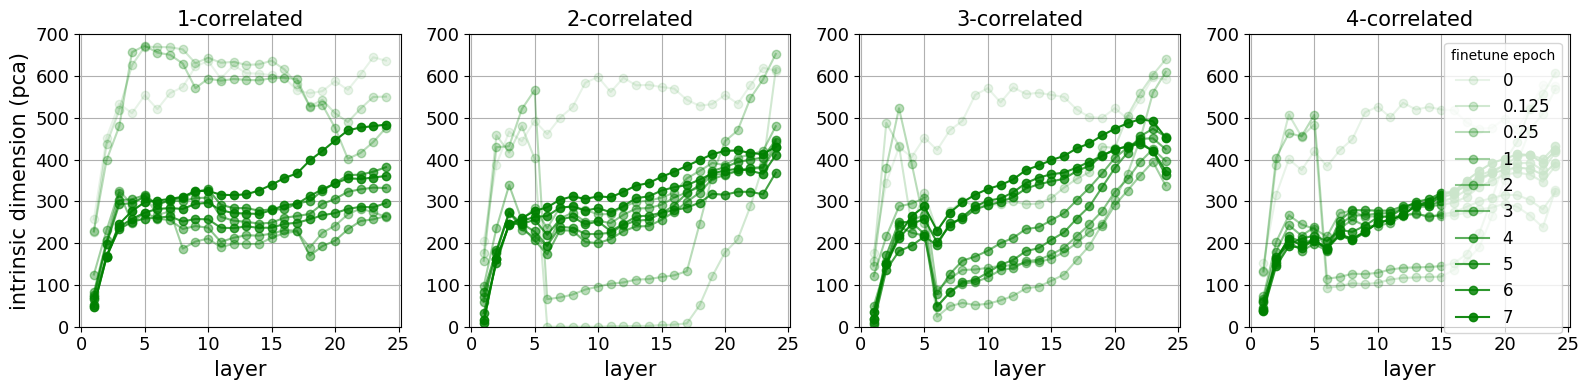

In [46]:
methods = {
    # 'mle': 'red', 
           'twonn': 'purple', 
           'pca': 'green', 
           # 'pr': 'blue'
          }
methods_ylim = {'mle': [9, 36], 'twonn': [5, 36], 'pca': [0, 700], 'pr': [0, 50]}
finetune_epochs = [0, 0.125, 0.25, 1, 2, 3, 4, 5, 6, 7]



for method in methods:
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
    for i, PROMPT in enumerate(PROMPTS):
        ax = axs[i]
        
        for j, ckpt in enumerate(CKPTS):
            print('ckpt', ckpt)
            print(PROMPT)
            
            with open(fileformat.format(PROMPT, ckpt), 'r') as f:
                results = json.load(f)
                
            id = results[method]['id'] if method in ['mle', 'twonn'] else results['pca'][f'{method}_id']
            
            ax.plot(range(1, len(id)+1), id, 
                    label=f"{finetune_epochs[j]}", 
                    alpha = 1 / (len(finetune_epochs) + 1) * (j + 1), 
                    color=methods[method], 
                    marker='o',
                   )
            ax.set_title(f'{PROMPT}-correlated', fontsize=15)
            ax.set_ylim(methods_ylim[method])
            ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
            ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
        
        axs[0].set_ylabel(f'intrinsic dimension ({method})', fontsize=15)
        axs[-1].legend(title='finetune epoch', fontsize=12)
        ax.set_xlabel('layer', fontsize=15)
        ax.grid()
        
    fig.tight_layout()
    # for ext in 'png', 'pdf':
        # fig.savefig(f'/home/echeng/llm_compositionality/results/plots/{method}_finetuning_id_train_data.{ext}')

/tmp/ipykernel_1516598/4125465105.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
/tmp/ipykernel_1516598/4125465105.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)


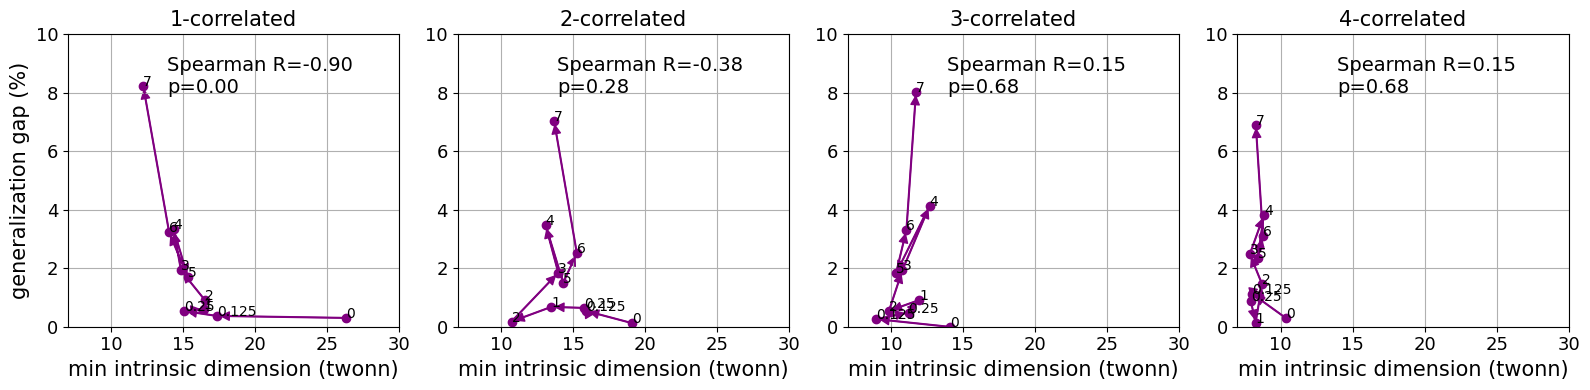

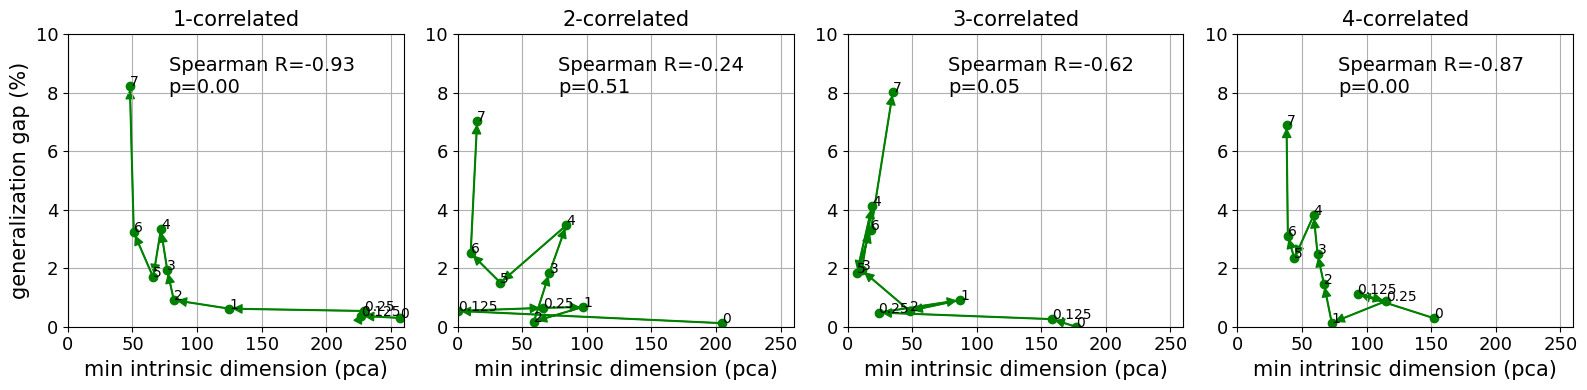

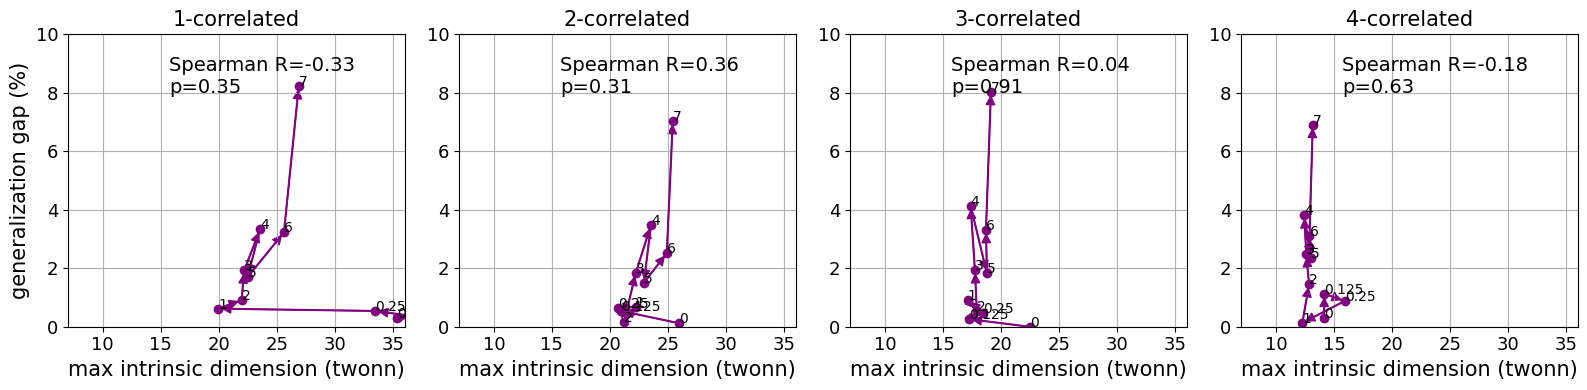

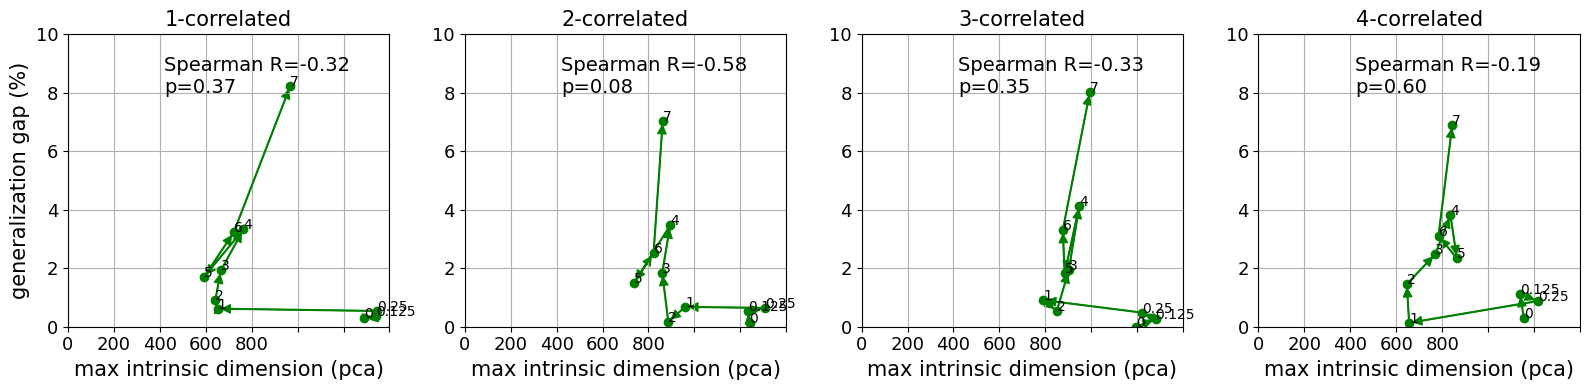

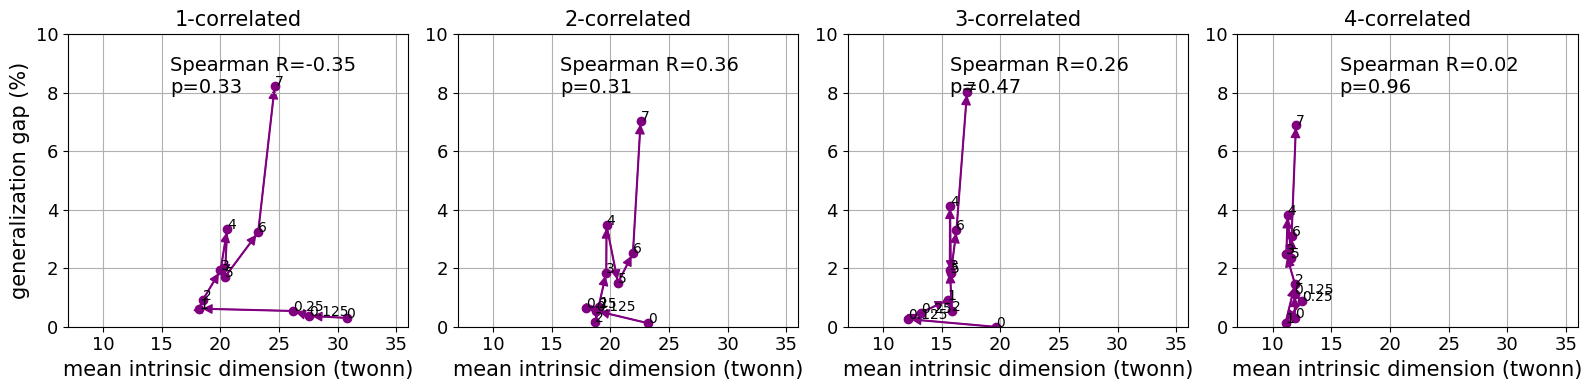

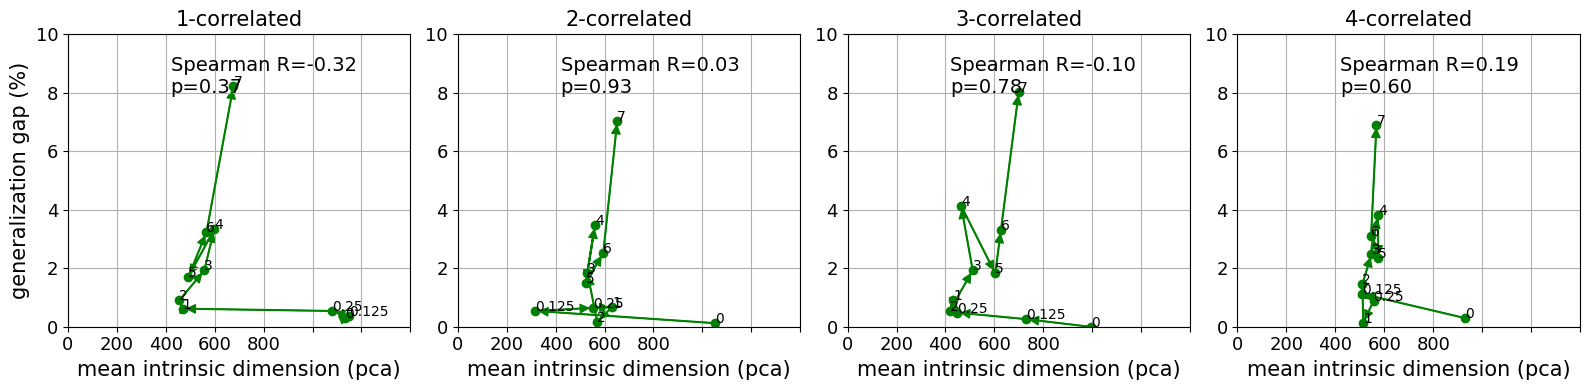

In [48]:
methods = {
    # 'mle': 'red', 
    'twonn': 'purple', 'pca': 'green', 
    # 'pr': 'blue'
}
methods_xlim_min = {'mle': [10, 23], 'twonn': [7, 30], 'pca': [0, 260], 'pr': [0, 10]}
methods_xlim_max = {'mle': [14, 36], 'twonn': [7, 36], 'pca': [0, 700], 'pr': [0, 50]}
finetune_epochs = [0, 0.125, 0.25, 1, 2, 3, 4, 5, 6, 7]

# PLOT = 'min'
# PLOT = 'max'
PLOT = 'mean'

for PLOT in ['min', 'max', 'mean']:
    for method in methods:
        fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
        for i, PROMPT in enumerate(PROMPTS):
            ax = axs[i]
            compression_gaps = []
            ids = []

            for j, ckpt in enumerate(CKPTS):
                with open(fileformat.format(PROMPT, ckpt), 'r') as f:
                    results = json.load(f)

                with open(surprisalformat.format(ckpt, PROMPT), 'r') as f:
                    surprisals = json.load(f)
                    train_surprisal = np.mean(surprisals['per_token_train_surprisal_sequence'])
                    test_surprisal = np.mean(surprisals['per_token_test_surprisal_sequence'])
                    compression_gap = (test_surprisal - train_surprisal) / train_surprisal * 100 # in bits

                compression_gaps.append(compression_gap)

                id = results[method]['id'] if method in ['mle', 'twonn'] else results['pca'][f'{method}_id']
                if PLOT == 'min':
                    max_id = np.min(id)
                elif PLOT == 'max':
                    max_id = np.max(id)
                else:
                    max_id = np.mean(id)
                ids.append(max_id)

            r, p = spearmanr(ids, compression_gaps)
            ax.plot(ids, compression_gaps, 
                    color=methods[method], 
                    marker='o',
                   )
            # Draw arrows
            for i in range(len(ids)-1):
                arrow = FancyArrowPatch((ids[i], compression_gaps[i]), (ids[i+1], compression_gaps[i+1]),
                                            arrowstyle='-|>', color=methods[method],
                                            mutation_scale=15)
                ax.add_patch(arrow)
                ax.annotate(finetune_epochs[i], (ids[i] + 0.002, compression_gaps[i] + 0.001))
            ax.annotate(finetune_epochs[-1], (ids[-1] + 0.001, compression_gaps[-1] + 0.001))

            ax.scatter([ids[0]], [compression_gaps[0]], marker='*', s=30, color=methods[method])
            ax.text(0.3, 0.8, f'Spearman R={r:.2f}\np={p:.2f}', transform=ax.transAxes, fontsize=14, color='black')
            ax.set_title(f'{PROMPT}-correlated', fontsize=15)
            ax.set_ylim([0, 10])
            ax.set_xlim(methods_xlim_min[method] if PLOT == 'min' else methods_xlim_max[method])
            ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
            ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)

            axs[0].set_ylabel(r'generalization gap (%)', fontsize=15)
            ax.set_xlabel(f'{PLOT} intrinsic dimension ({method})', fontsize=15)
            ax.grid()

        fig.tight_layout()
        fig.show()
        # for ext in 'png', 'pdf':
            # fig.savefig(f'/home/echeng/llm_compositionality/results/plots/{PLOT}_{method}_generalization_trajectory.{ext}')

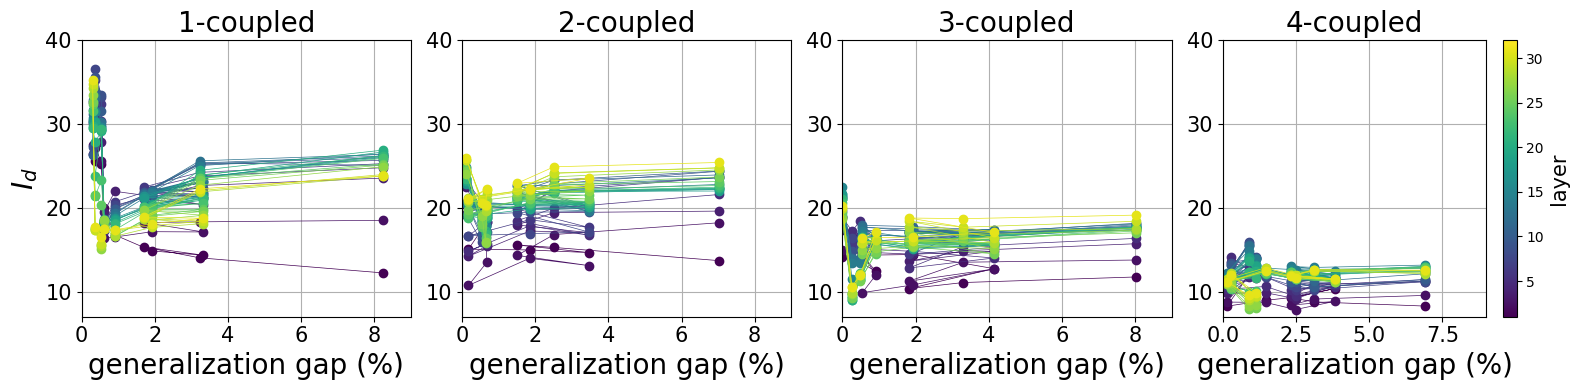

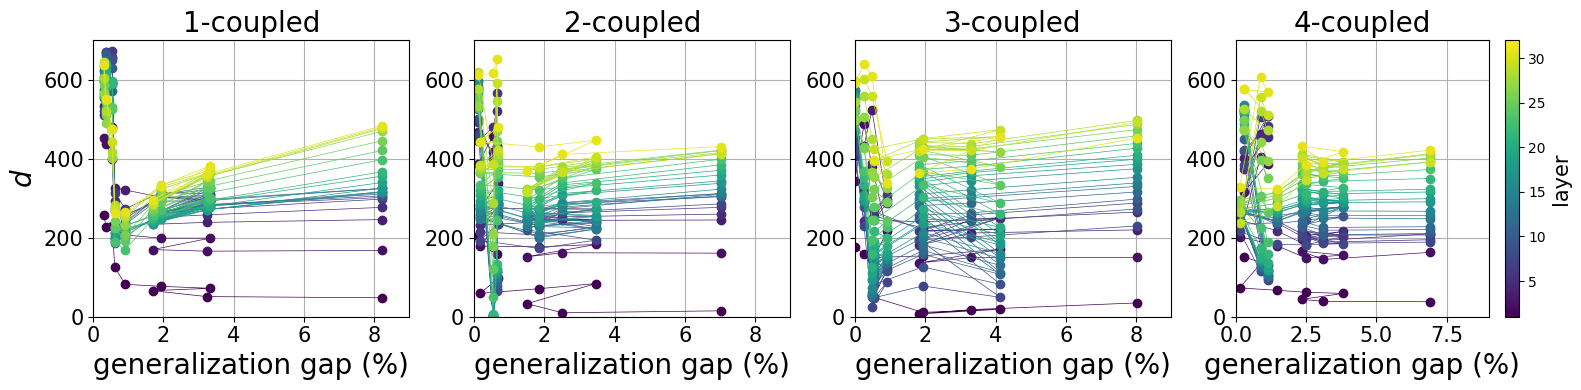

In [77]:
methods = {
    # 'mle': 'red', 
    'twonn': 'purple', 'pca': 'green', 
    # 'pr': 'blue'
}
methods_xlim_min = {'mle': [10, 23], 'twonn': [7, 30], 'pca': [0, 260], 'pr': [0, 10]}
methods_xlim_max = {'mle': [14, 36], 'twonn': [7, 40], 'pca': [0, 700], 'pr': [0, 50]}
finetune_epochs = [0, 0.125, 0.25, 1, 2, 3, 4, 5, 6, 7]

for method in methods:
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
    for i, PROMPT in enumerate(PROMPTS):
        ax = axs[i]
        compression_gaps = []
        ids = []

        for j, ckpt in enumerate(CKPTS):
            with open(fileformat.format(PROMPT, ckpt), 'r') as f:
                results = json.load(f)

            with open(surprisalformat.format(ckpt, PROMPT), 'r') as f:
                surprisals = json.load(f)
                train_surprisal = np.mean(surprisals['per_token_train_surprisal_sequence'])
                test_surprisal = np.mean(surprisals['per_token_test_surprisal_sequence'])
                compression_gap = (test_surprisal - train_surprisal) / train_surprisal * 100 # in bits

            compression_gaps.append(compression_gap)

            id = results[method]['id'] if method in ['mle', 'twonn'] else results['pca'][f'{method}_id']
            ids.append(id)
        # r, p = spearmanr(ids, compression_gaps)
        
        for t in range(0, len(id)):
            ax.plot(compression_gaps, [id[t] for id in ids],
                    color=plt.cm.viridis(t/len(id)), #methods[method], 
                    # alpha=t/len(id),
                    marker='o',
                    linewidth=0.5
                   )
            # # Draw arrows
            # for i in range(len(ids)-1):
            #     arrow = FancyArrowPatch((ids[i], compression_gaps[i]), (ids[i+1], compression_gaps[i+1]),
            #                                 arrowstyle='-|>', color=methods[method],
            #                                 mutation_scale=15)
            #     ax.add_patch(arrow)
            #     ax.annotate(finetune_epochs[i], (ids[i] + 0.002, compression_gaps[i] + 0.001))
            # ax.annotate(finetune_epochs[-1], (ids[-1] + 0.001, compression_gaps[-1] + 0.001))

        # ax.scatter([ids[0]], [compression_gaps[0]], marker='*', s=30, color=methods[method])
        # ax.text(0.3, 0.8, f'Spearman R={r:.2f}\np={p:.2f}', transform=ax.transAxes, fontsize=14, color='black')
        ax.set_title(f'{PROMPT}-coupled', fontsize=20)
        ax.set_xlim([0, 9])
        ax.set_ylim(methods_xlim_max[method])
        ax.tick_params(axis='y', labelsize=15)
        ax.tick_params(axis='x', labelsize=15)

        ax.set_xlabel(r'generalization gap (%)', fontsize=20)
        if method == 'twonn':
            axs[0].set_ylabel(f'{r"$I_d$"}', fontsize=20)
        else:
            axs[0].set_ylabel(f'{r"$d$"}', fontsize=20)

        ax.grid()

    norm = Normalize(vmin=1, vmax=32)
    cmap = cm.viridis
    
    # ScalarMappable is needed to artificially add a colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # We don’t use any actual data array, so we set an empty array
    
    # 2. Add the colorbar to the right of the figure
    cbar = fig.colorbar(sm, ax=ax)
    
    # 3. Optional: Label the colorbar
    cbar.set_label('layer', fontsize=15)
    
    fig.tight_layout()
    # fig.show()
    for ext in 'png', 'pdf':
        fig.savefig(f'/home/echeng/llm_compositionality/results/plots/all_layers_410m_{method}_generalization_trajectory.{ext}')

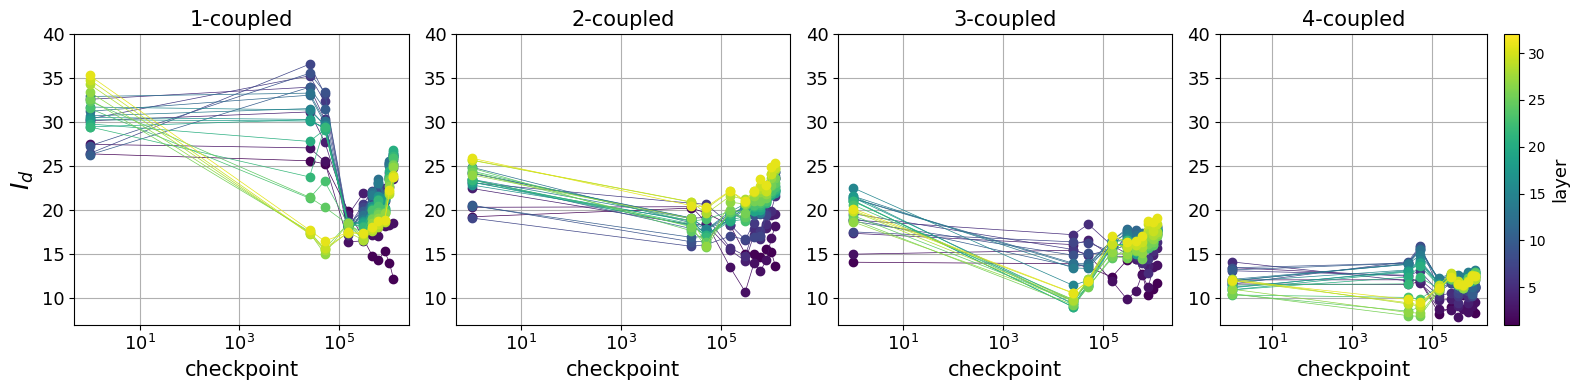

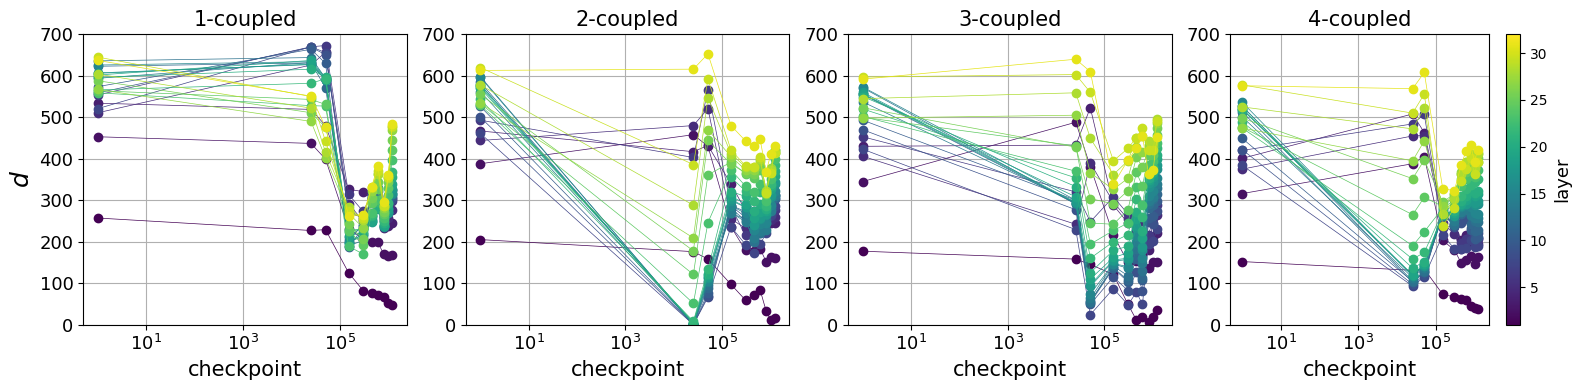

In [70]:
methods = {
    # 'mle': 'red', 
    'twonn': 'purple', 'pca': 'green', 
    # 'pr': 'blue'
}
methods_xlim_min = {'mle': [10, 23], 'twonn': [7, 30], 'pca': [0, 260], 'pr': [0, 10]}
methods_xlim_max = {'mle': [14, 36], 'twonn': [7, 40], 'pca': [0, 700], 'pr': [0, 50]}
finetune_epochs = [0, 0.125, 0.25, 1, 2, 3, 4, 5, 6, 7]

for method in methods:
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
    for i, PROMPT in enumerate(PROMPTS):
        ax = axs[i]
        compression_gaps = []
        ids = []

        for j, ckpt in enumerate(CKPTS):
            with open(fileformat.format(PROMPT, ckpt), 'r') as f:
                results = json.load(f)

            id = results[method]['id'] if method in ['mle', 'twonn'] else results['pca'][f'{method}_id']
            ids.append(id)
        # r, p = spearmanr(ids, compression_gaps)
        
        for t in range(0, len(id)):
            ckpts = CKPTS.copy()
            ckpts[0] = 1
            ax.plot(ckpts, [id[t] for id in ids],
                    linewidth=0.5,
                    color=plt.cm.viridis(t/len(id)), #methods[method], 
                    # alpha=t/len(id),
                    marker='o',
                   )
            # # Draw arrows
            # for i in range(len(ids)-1):
            #     arrow = FancyArrowPatch((ids[i], compression_gaps[i]), (ids[i+1], compression_gaps[i+1]),
            #                                 arrowstyle='-|>', color=methods[method],
            #                                 mutation_scale=15)
            #     ax.add_patch(arrow)
            #     ax.annotate(finetune_epochs[i], (ids[i] + 0.002, compression_gaps[i] + 0.001))
            # ax.annotate(finetune_epochs[-1], (ids[-1] + 0.001, compression_gaps[-1] + 0.001))

        # ax.scatter([ids[0]], [compression_gaps[0]], marker='*', s=30, color=methods[method])
        # ax.text(0.3, 0.8, f'Spearman R={r:.2f}\np={p:.2f}', transform=ax.transAxes, fontsize=14, color='black')
        ax.set_title(f'{PROMPT}-coupled', fontsize=15)
        # ax.set_xlim([0, 10])
        ax.set_xscale('log')
        ax.set_ylim(methods_xlim_max[method])
        ax.tick_params(axis='y', labelsize=13)
        ax.tick_params(axis='x', labelsize=13)

        ax.set_xlabel(r'checkpoint', fontsize=15)
        if method == 'twonn':
            axs[0].set_ylabel(f'{r"$I_d$"}', fontsize=18)
        elif method == 'pca':
            axs[0].set_ylabel(f'{r"$d$"}', fontsize=18)

        ax.grid()

    norm = Normalize(vmin=1, vmax=32)
    cmap = cm.viridis
    
    # ScalarMappable is needed to artificially add a colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # We don’t use any actual data array, so we set an empty array
    
    # 2. Add the colorbar to the right of the figure
    cbar = fig.colorbar(sm, ax=ax)
    
    # 3. Optional: Label the colorbar
    cbar.set_label('layer', fontsize=13)
    
    fig.tight_layout()
    # fig.show()
    for ext in 'png', 'pdf':
        fig.savefig(f'/home/echeng/llm_compositionality/results/plots/all_layers_410m_{method}_finetune_trajectory.{ext}')

In [7]:
from scipy.stats import spearmanr, pearsonr

/tmp/ipykernel_1516598/2982841588.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
/tmp/ipykernel_1516598/2982841588.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)


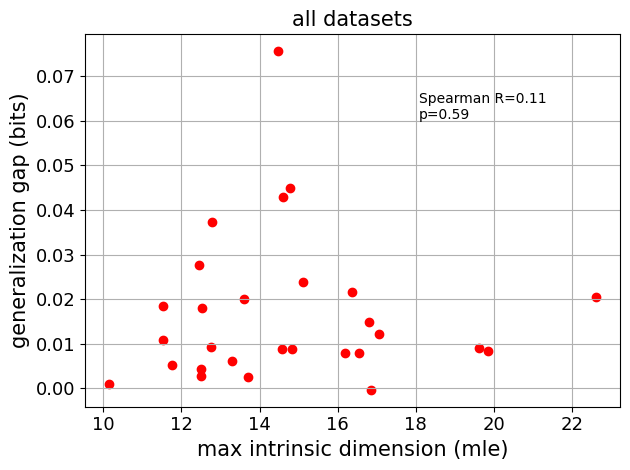

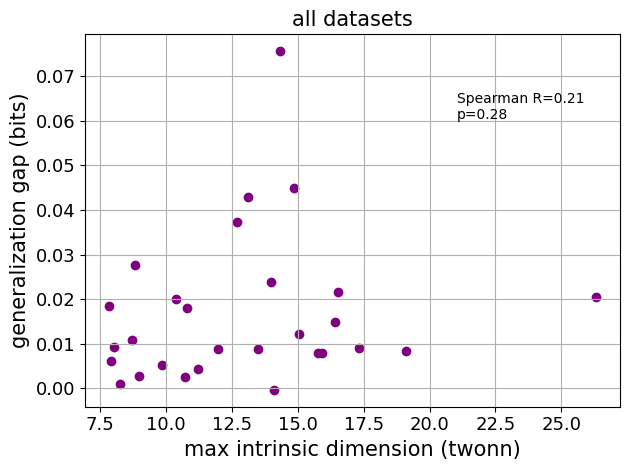

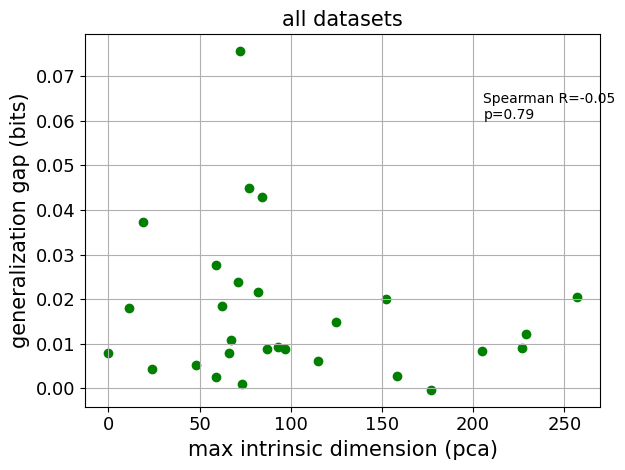

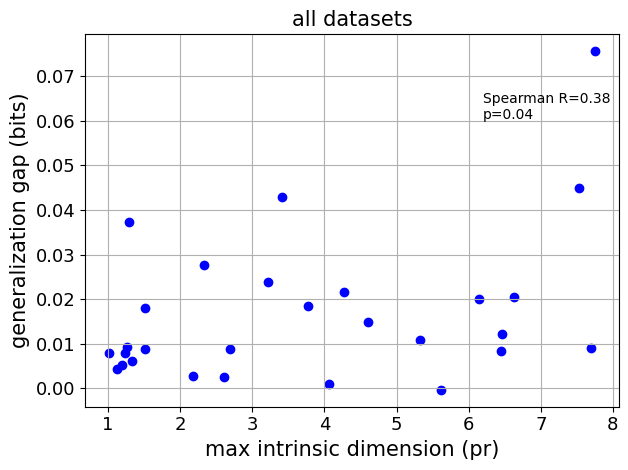

In [9]:
methods = {'mle': 'red', 'twonn': 'purple', 'pca': 'green', 'pr': 'blue'}
finetune_epochs = [0, 0.125, 0.25, 1, 2, 3, 4]

for method in methods:
    fig, ax = plt.subplots()
    compression_gaps = []
    ids = []
    for i, PROMPT in enumerate([1, 2, 3, 4]):
        for j, ckpt in enumerate(CKPTS):
            with open(fileformat.format(PROMPT, ckpt), 'r') as f:
                results = json.load(f)
                
            with open(surprisalformat.format(ckpt, PROMPT), 'r') as f:
                surprisals = json.load(f)
                train_surprisal = np.mean(surprisals['per_token_train_surprisal_sequence'])
                test_surprisal = np.mean(surprisals['per_token_test_surprisal_sequence'])
#                 train_surprisal = surprisals['avg_per_token_train_surprisal_corpus']
#                 test_surprisal = surprisals['avg_per_token_test_surprisal_corpus']
                compression_gap = (test_surprisal - train_surprisal) # in bits
            
            compression_gaps.append(compression_gap)
            
            id = results[method]['id'] if method in ['mle', 'twonn'] else results['pca'][f'{method}_id']
            max_id = np.min(id)
            ids.append(max_id)
            
    ax.scatter(ids, compression_gaps, 
            label=f"{finetune_epochs[j]}", 
            color=methods[method], 
            marker='o',
           )
    
    r, p = spearmanr(ids, compression_gaps)
    ax.annotate(f'Spearman R={r:.2f}\np={p:.2f}', (0.8 * max(ids), 0.8 * max(compression_gaps)))
    ax.set_title(f'all datasets', fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)

    ax.set_ylabel(f'generalization gap (bits)', fontsize=15)
    ax.set_xlabel(f'max intrinsic dimension ({method})', fontsize=15)
    ax.grid()
        
    fig.tight_layout()
    fig.show()
#     for ext in 'png', 'pdf':
#         fig.savefig(f'/home/echeng/llm_compositionality/results/plots/{method}_finetuning_id_train_data.{ext}')